In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mahnazarjmand/customer-segmentation")

print("Path to dataset files:", path)

c:\Users\zeyad-mohamed\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\zeyad-mohamed\.cache\kagglehub\datasets\mahnazarjmand\customer-segmentation\versions\1


In [3]:
import os

data = os.path.join(path, "Customer_Data (1).csv")

In [4]:
import pandas as pd
dataset = pd.read_csv(data)

dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
dataset.shape

(8950, 18)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
dataset.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
dataset = dataset.drop(columns=["CUST_ID"])

In [9]:
dataset["CREDIT_LIMIT"] = dataset["CREDIT_LIMIT"].fillna(dataset["CREDIT_LIMIT"].median())
dataset["MINIMUM_PAYMENTS"] = dataset["MINIMUM_PAYMENTS"].fillna(dataset["MINIMUM_PAYMENTS"].median())

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [11]:
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

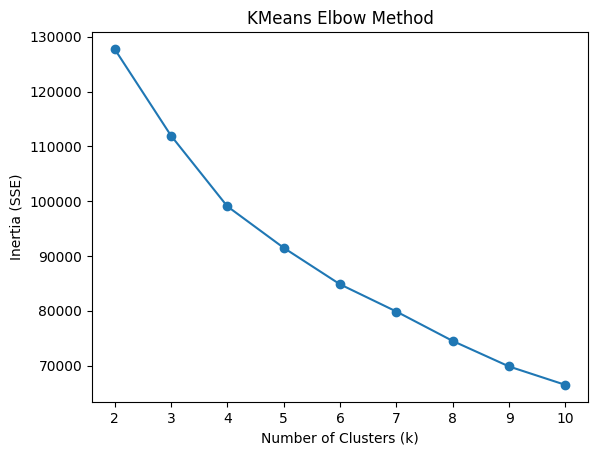

In [13]:
# Elbow Method to find optimal k
inertia = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

# Elbow Plot
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("KMeans Elbow Method")
plt.show()

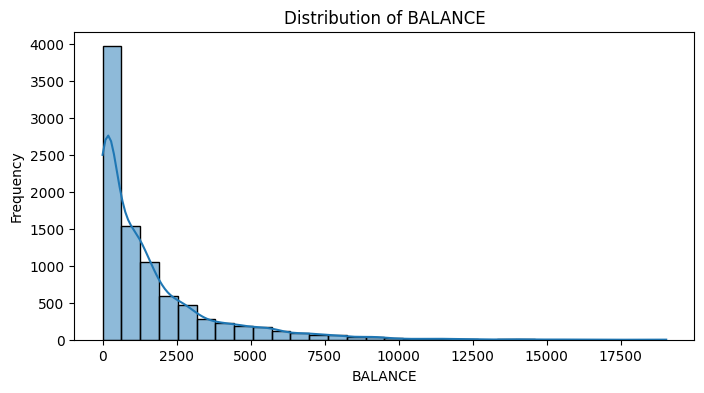

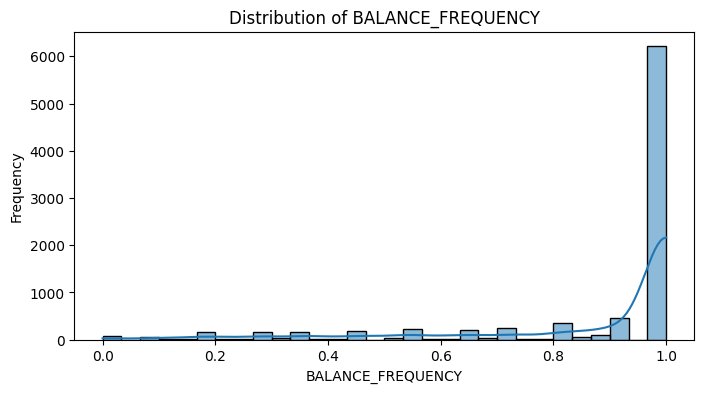

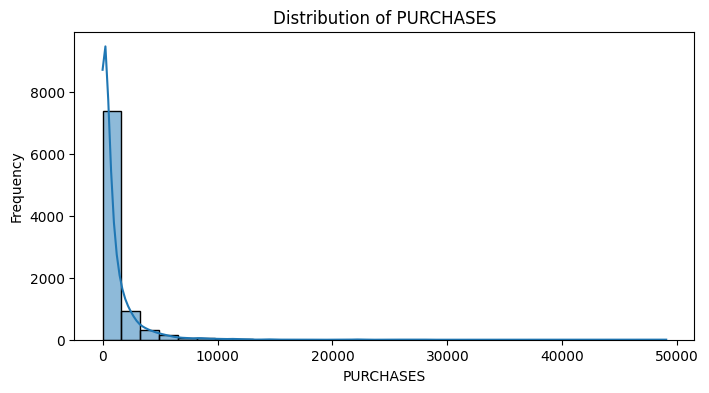

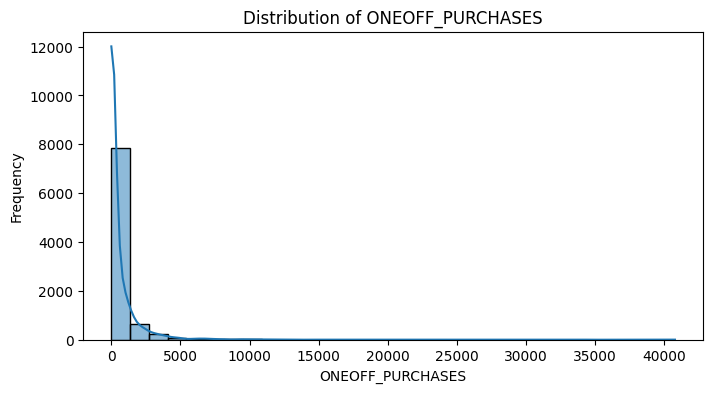

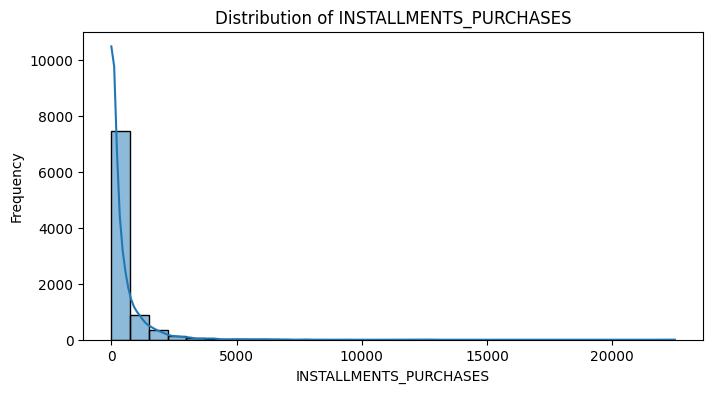

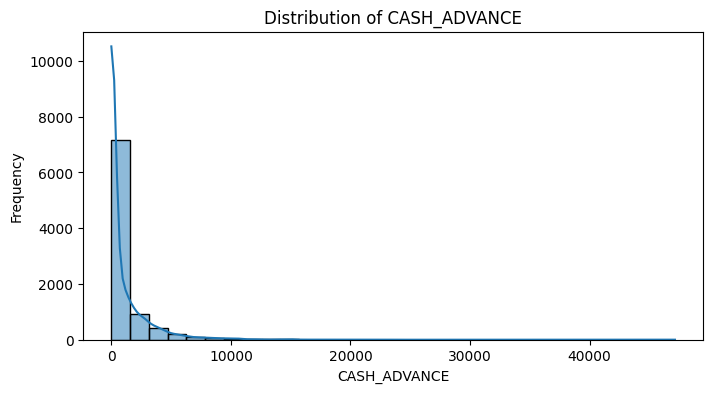

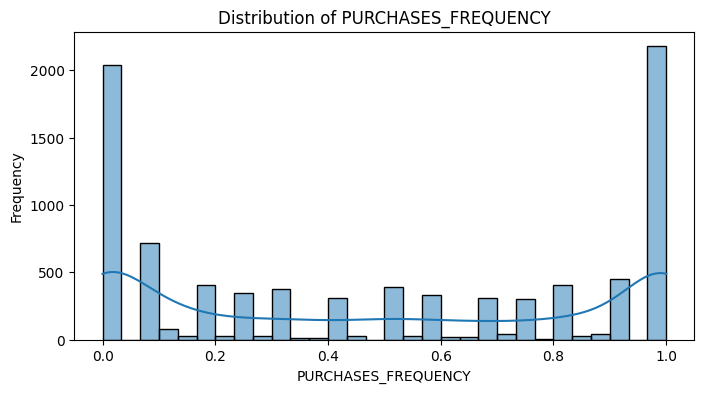

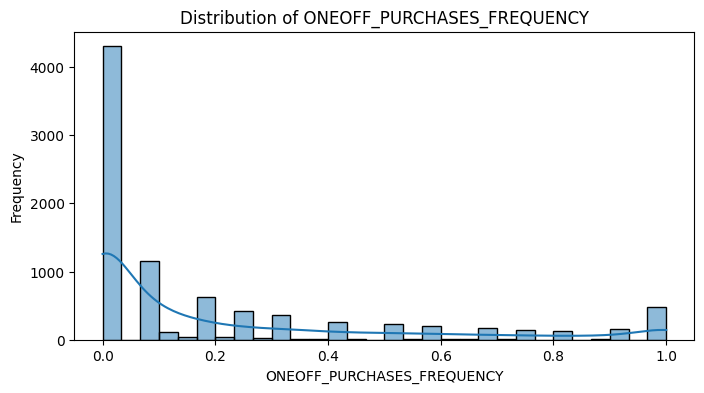

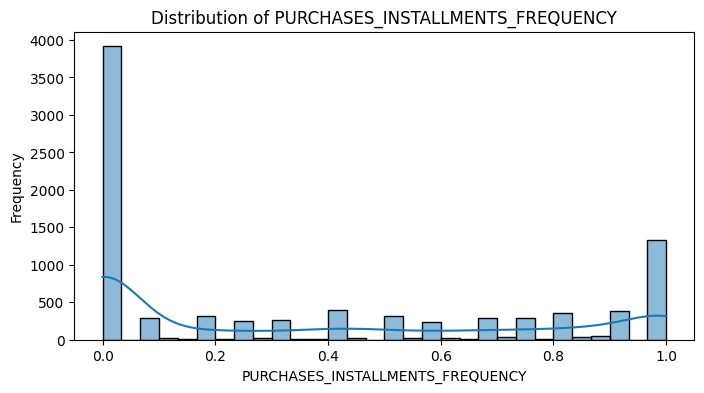

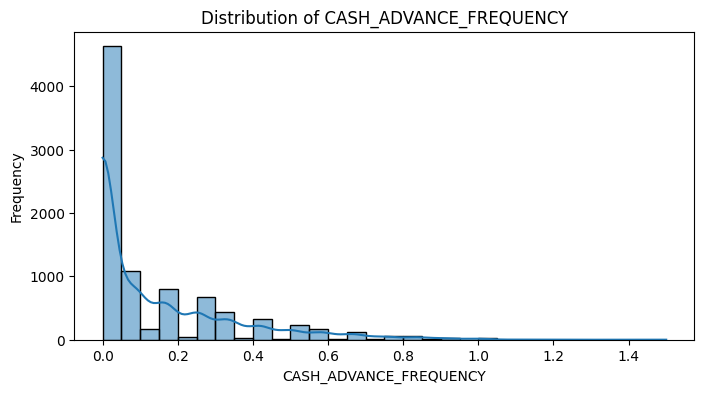

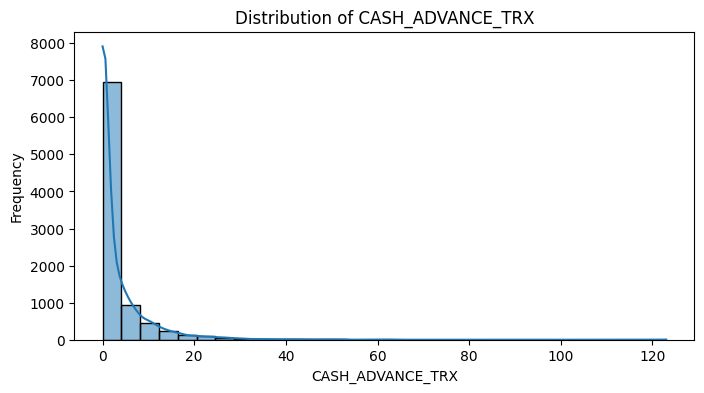

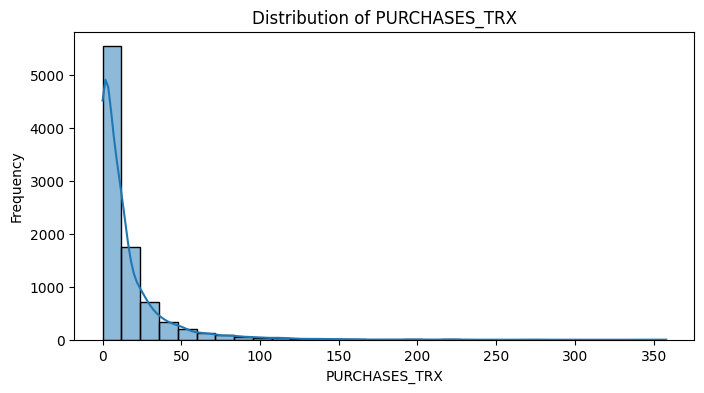

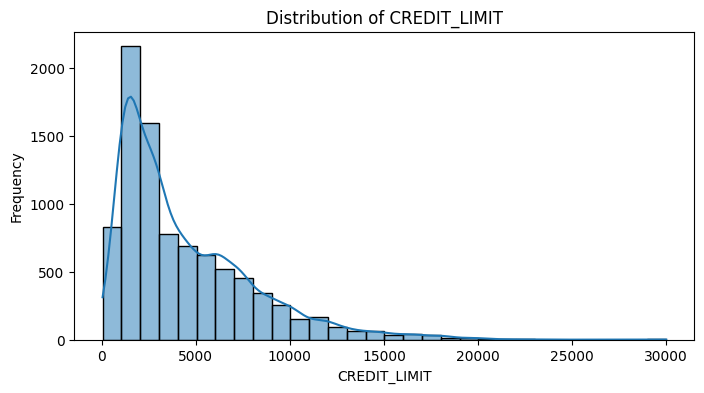

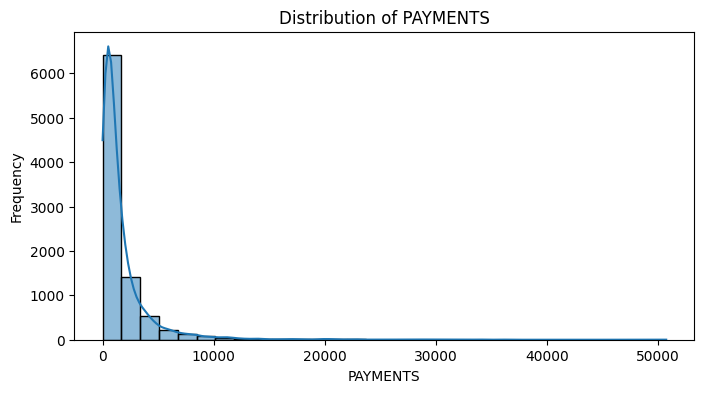

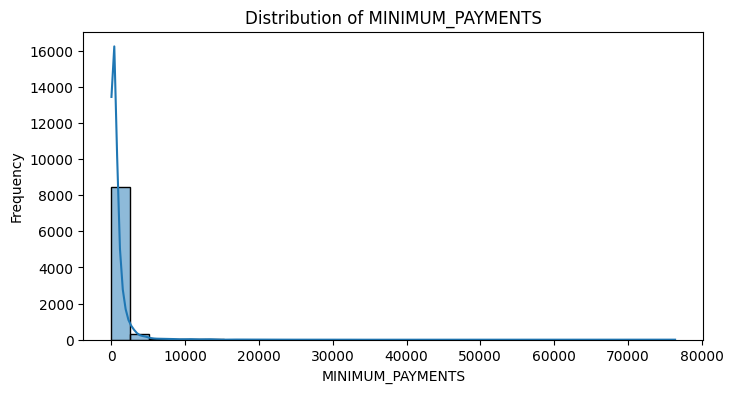

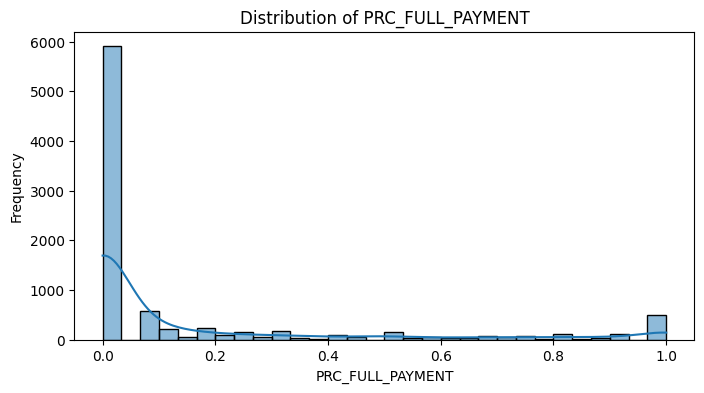

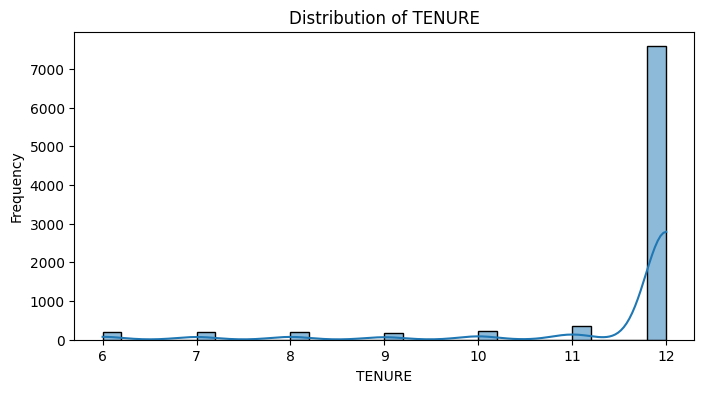

In [21]:
for col in dataset.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

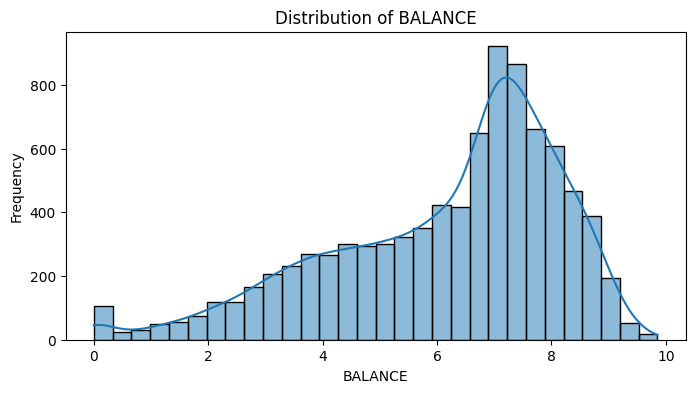

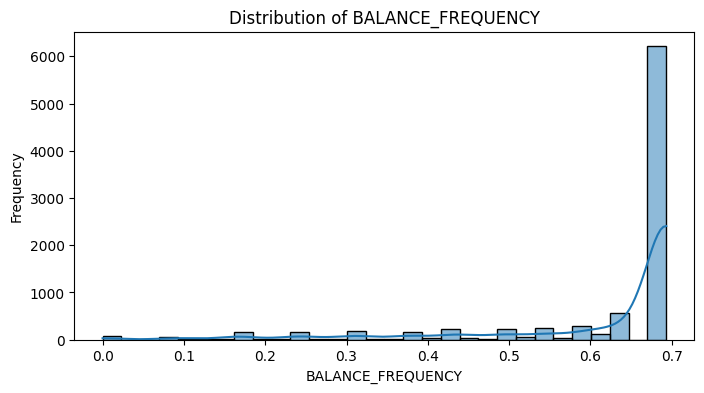

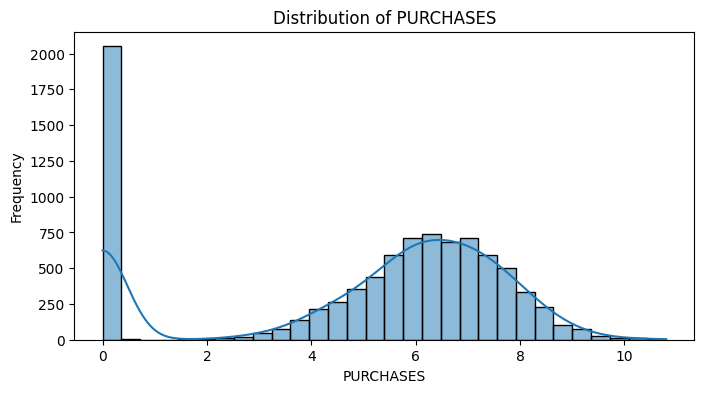

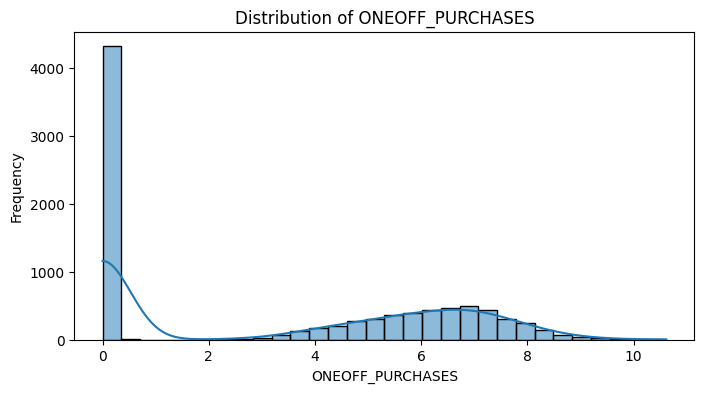

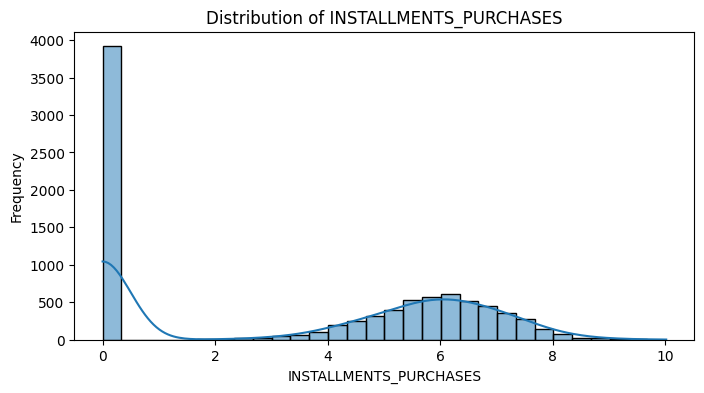

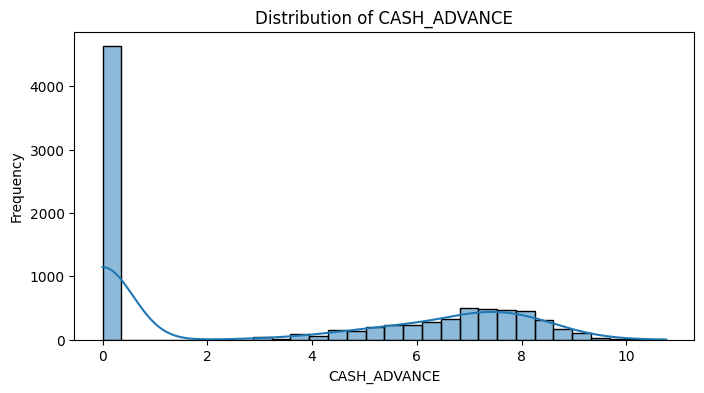

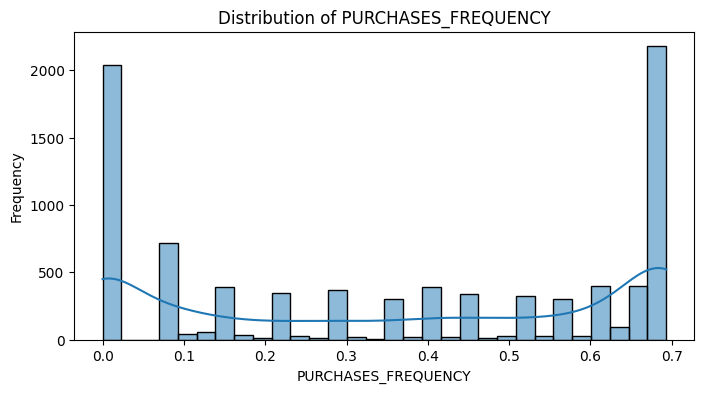

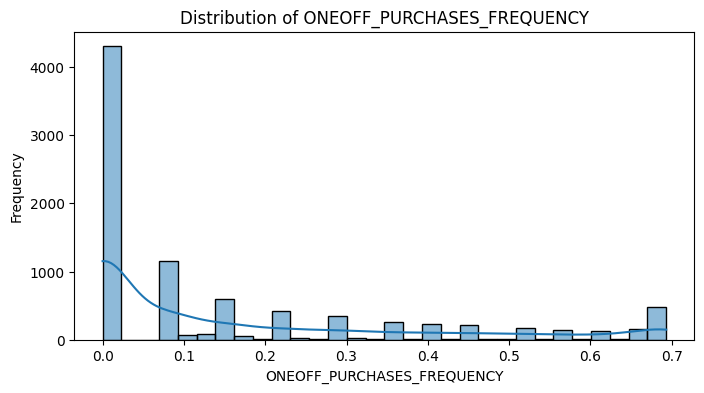

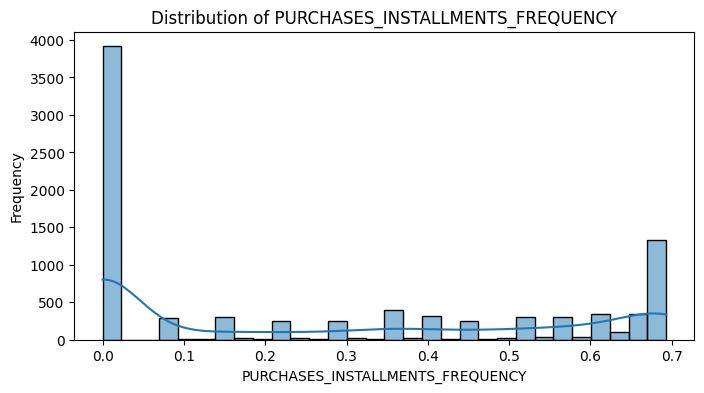

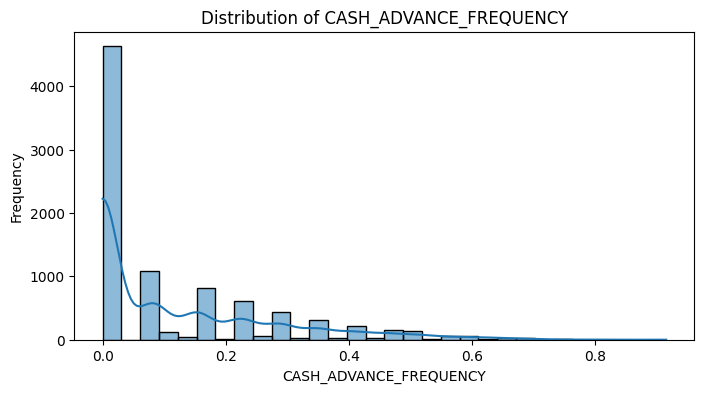

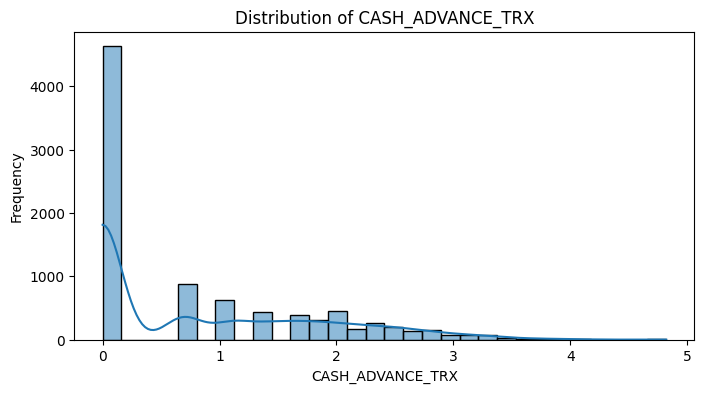

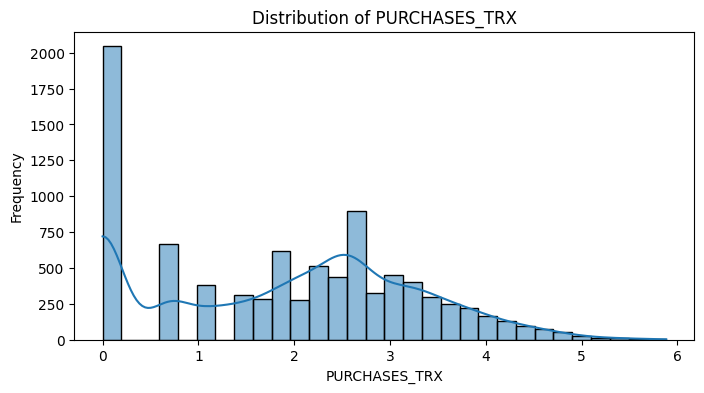

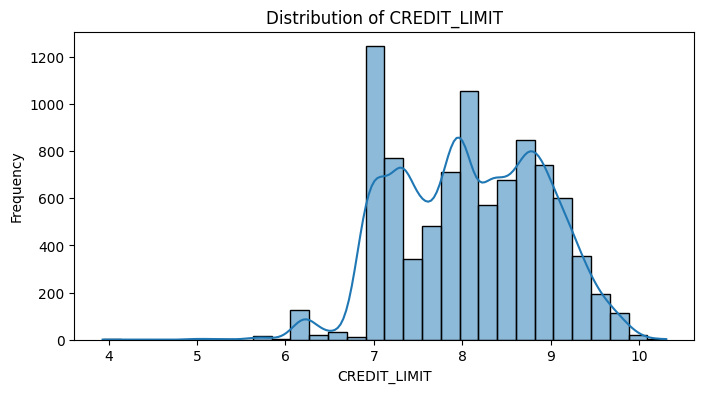

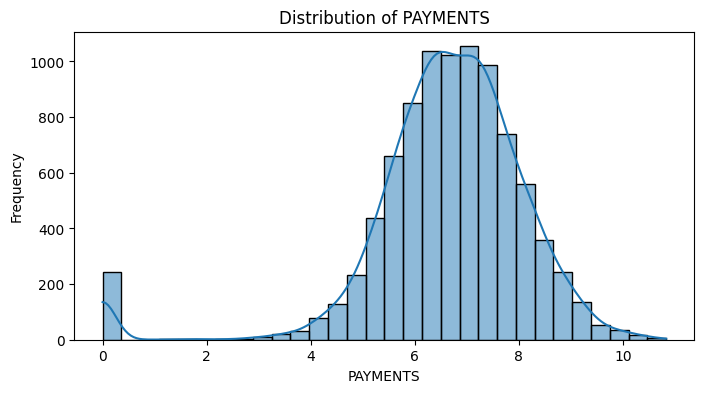

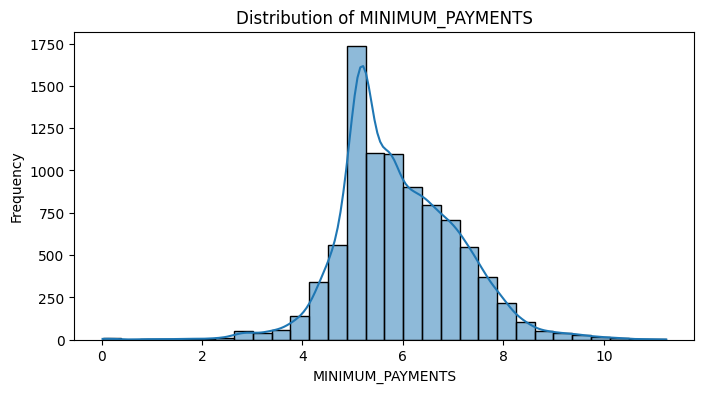

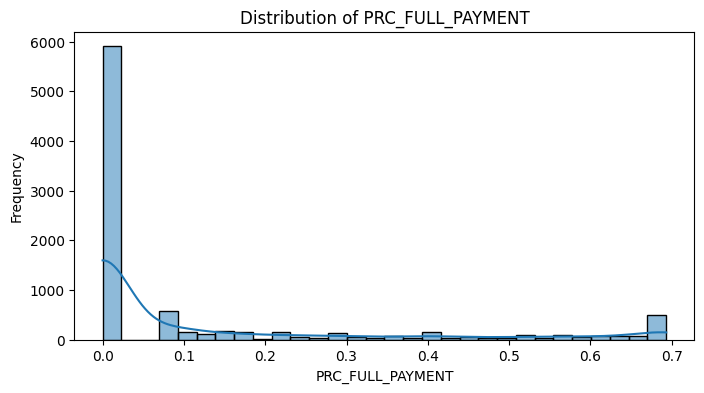

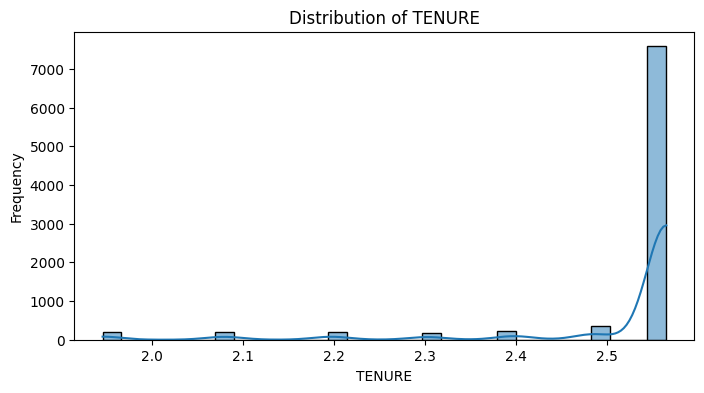

In [22]:
for col in dataset.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(np.log1p(dataset[col]), bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [15]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_scaled = scaler.fit_transform(np.log1p(dataset))


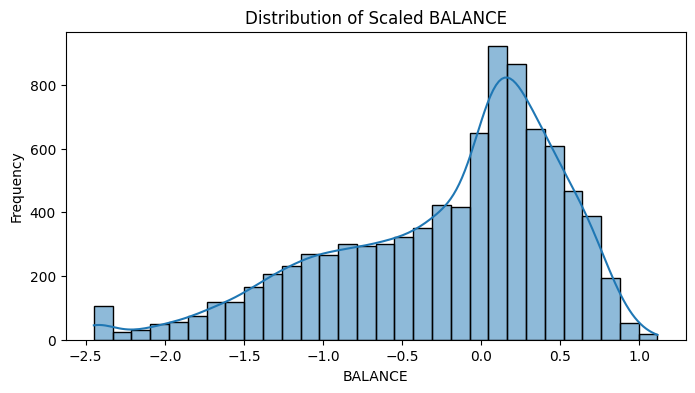

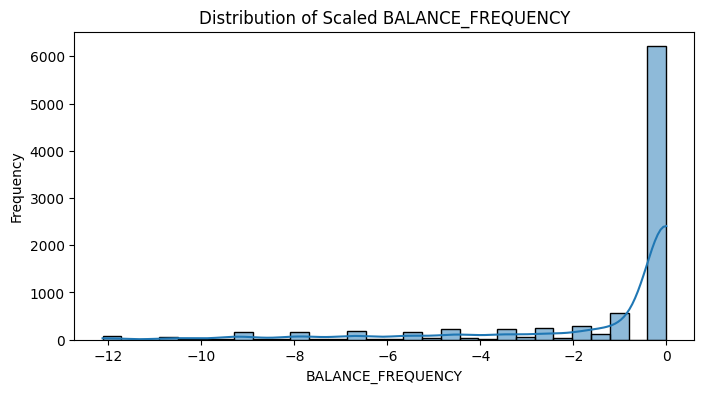

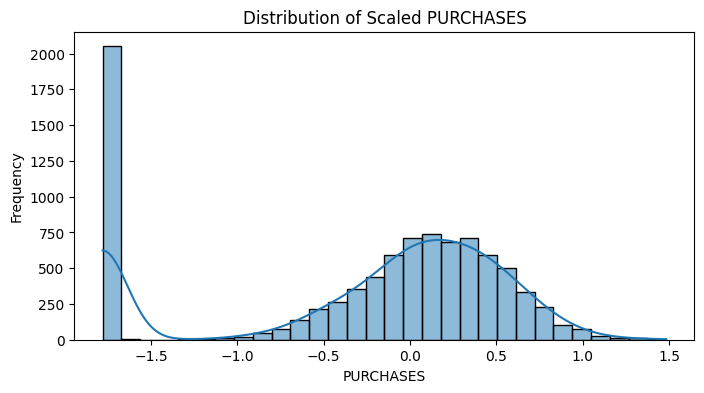

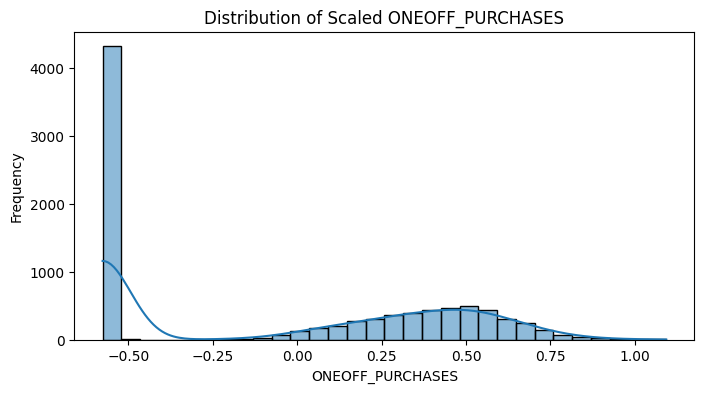

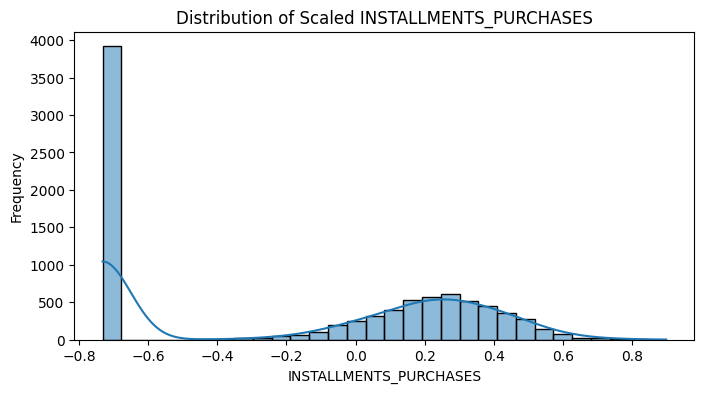

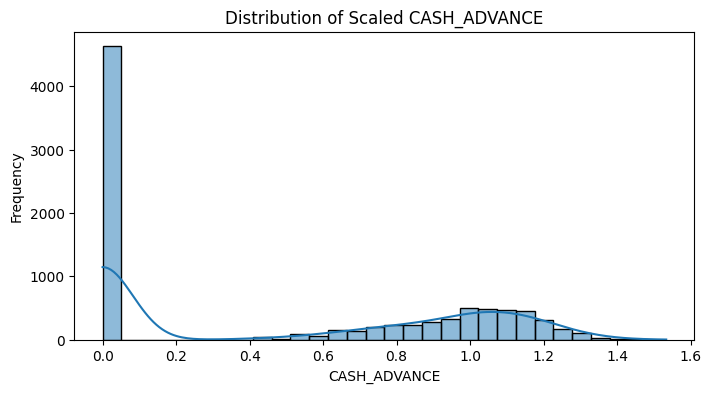

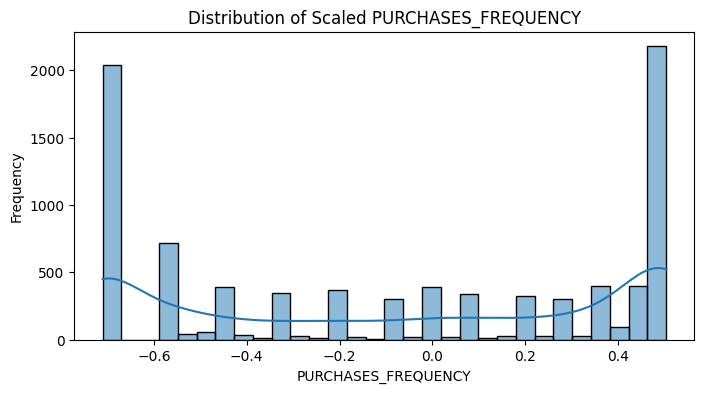

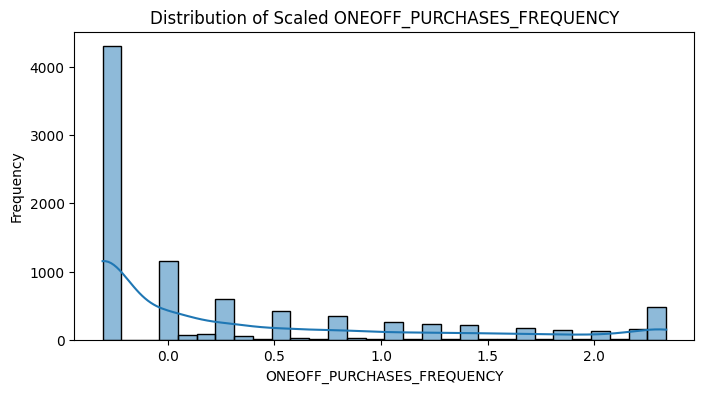

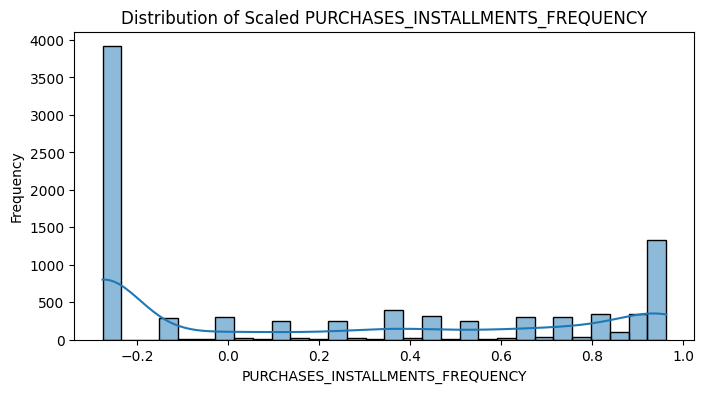

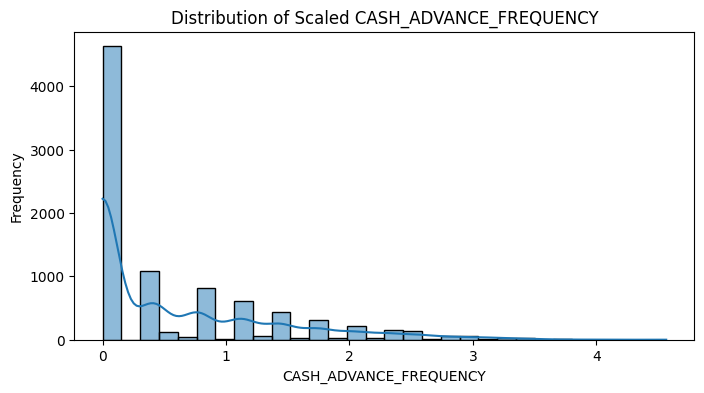

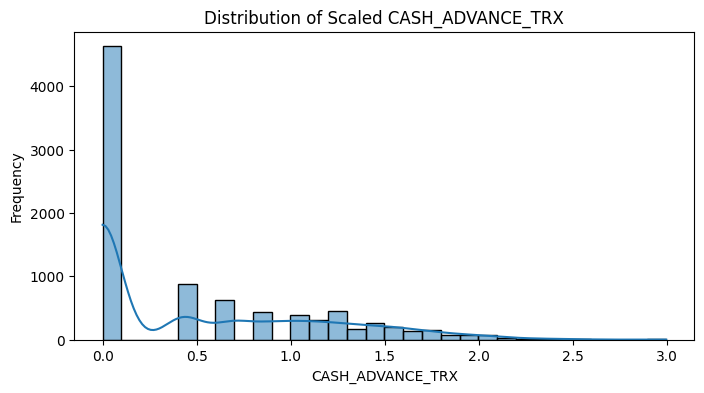

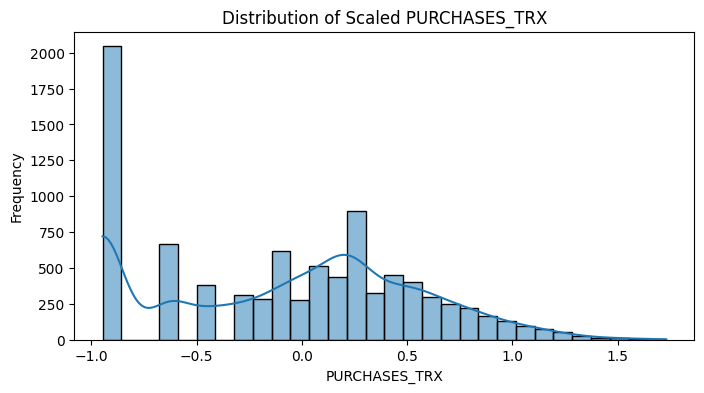

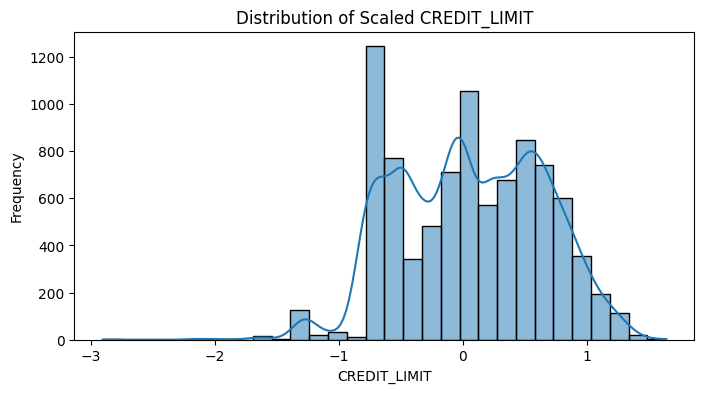

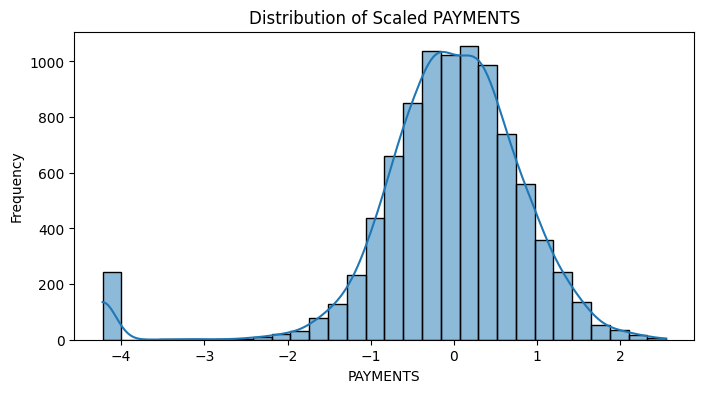

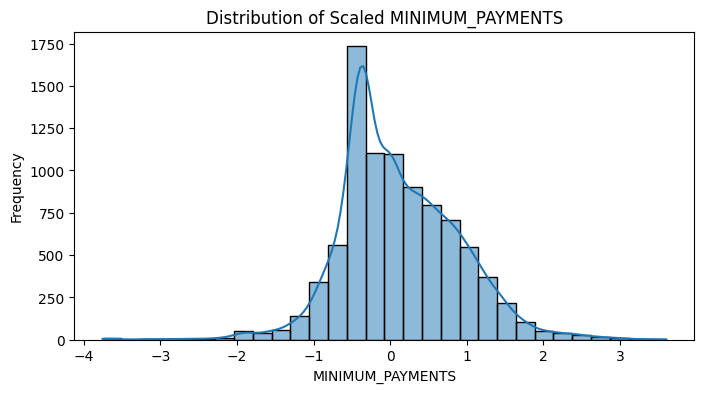

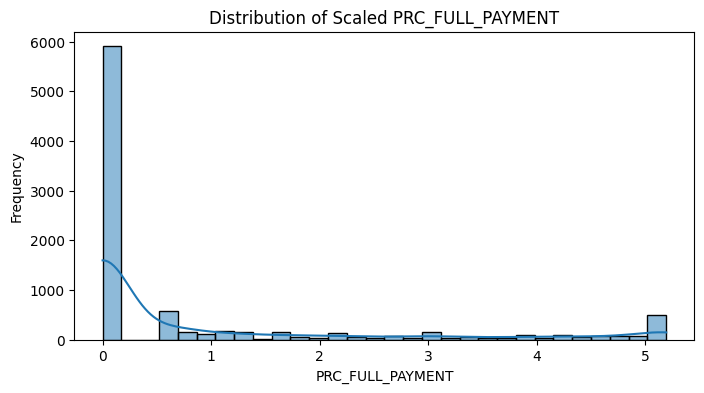

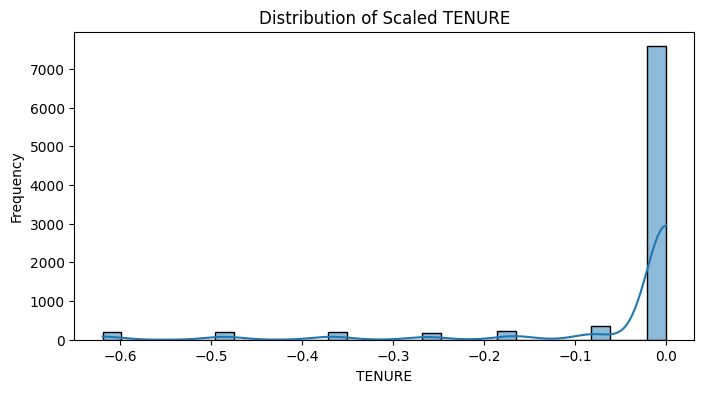

In [28]:
for col in dataset.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_scaled[:, dataset.columns.get_loc(col)], bins=30, kde=True)
    plt.title(f"Distribution of Scaled {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

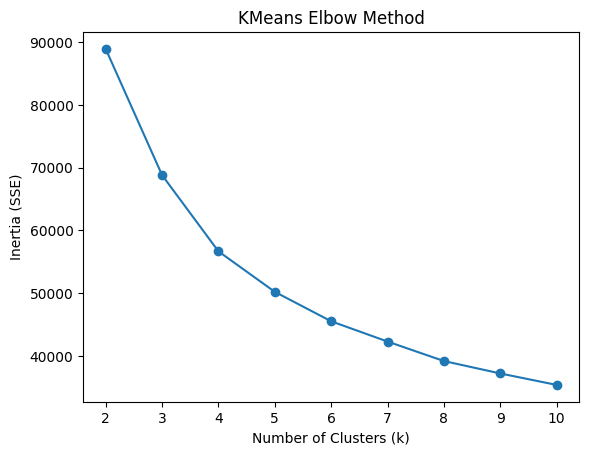

In [16]:
inertia = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

# Elbow Plot
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("KMeans Elbow Method")
plt.show()

In [18]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)



df_scaled_with_clusters = pd.DataFrame(df_scaled, columns=dataset.columns)
df_scaled_with_clusters["Cluster"] = clusters

In [19]:
df_scaled_with_clusters

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,-1.098374,-1.667474,-0.400154,-0.576007,0.011167,0.000000,-0.440481,-0.305081,-0.132428,0.000000,0.000000,-0.446395,-0.783504,-0.901767,-0.525916,0.000000,0.000000,2
1,0.469421,-0.813879,-1.780990,-0.576007,-0.731443,1.250048,-0.710662,-0.305081,-0.275459,1.111990,1.000000,-0.946395,0.604504,0.978658,0.807362,1.502798,0.000000,0
2,0.379228,0.000000,0.229522,0.469827,-0.731443,0.000000,0.504223,2.336846,-0.275459,0.000000,0.000000,0.220964,0.653731,-0.199976,0.456190,0.000000,0.000000,2
3,0.233419,-3.510781,0.429440,0.573821,-0.731443,0.759885,-0.570371,0.000000,-0.275459,0.398875,0.430677,-0.630930,0.653731,-4.223218,0.000000,0.000000,0.000000,1
4,-0.023783,0.000000,-0.924648,-0.130552,-0.731443,0.000000,-0.570371,0.000000,-0.275459,0.000000,0.000000,-0.630930,-0.653517,-0.145917,-0.159225,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.225316,0.000000,-0.065060,-0.576007,0.191379,0.000000,0.504223,-0.305081,0.807670,0.000000,0.000000,-0.060773,-0.783504,-0.603844,-1.204950,3.036481,-0.619039,3
8946,-1.362447,0.000000,-0.056009,-0.576007,0.196246,0.000000,0.504223,-0.305081,0.807670,0.000000,0.000000,-0.060773,-0.783504,-0.707136,0.000000,0.000000,-0.619039,2
8947,-1.293875,-1.522289,-0.275934,-0.576007,0.077972,0.000000,0.351717,-0.305081,0.637357,0.000000,0.000000,-0.130930,-0.783504,-1.465873,-0.867823,1.671096,-0.619039,3
8948,-1.483062,-1.522289,-1.780990,-0.576007,-0.731443,0.516772,-0.710662,-0.305081,-0.275459,0.768179,0.682606,-0.946395,-1.277428,-1.734354,-1.120356,1.671096,-0.619039,0


In [18]:
type(df_scaled)

numpy.ndarray

In [19]:
type(df_scaled_with_clusters)

pandas.core.frame.DataFrame

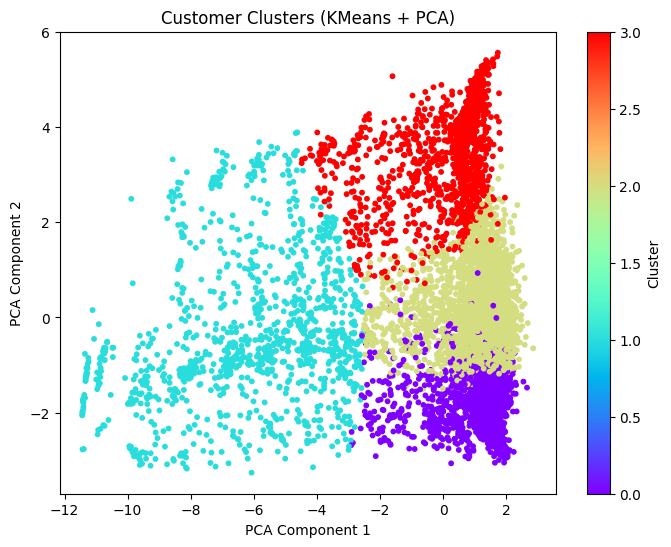

Cluster
2    4067
0    2363
3    1331
1    1189
Name: count, dtype: int64


In [20]:
# ---- PCA for visualization ----
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_scaled) 

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="rainbow", s=10)
plt.title("Customer Clusters (KMeans + PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

# ---- Cluster counts ----
print(df_scaled_with_clusters["Cluster"].value_counts())

In [20]:
kmeans.cluster_centers_

array([[ 2.44166957e-01, -3.18093235e-01, -1.41771033e+00,
        -4.30295295e-01, -6.71600520e-01,  9.92083373e-01,
        -6.32352284e-01, -2.10707965e-01, -2.41209130e-01,
         1.31209624e+00,  1.12805933e+00, -8.07418925e-01,
         5.34417321e-02,  7.71499551e-03,  4.60067959e-01,
         1.62808750e-01, -5.45863749e-02],
       [-1.27414139e+00, -7.19550416e+00, -5.17821667e-01,
        -2.32077679e-01, -3.36468027e-01,  2.86058548e-01,
        -3.34904453e-01, -7.87310903e-02,  1.91915775e-03,
         2.10893777e-01,  2.34239647e-01, -3.84911639e-01,
        -7.30433553e-02, -8.08139417e-01, -6.23317128e-01,
         1.02721744e+00, -6.47652555e-02],
       [ 3.13627430e-03, -2.58284473e-01,  2.16695252e-01,
         1.55296622e-01,  1.94055915e-02,  3.59174963e-01,
         1.77945229e-01,  5.99046591e-01,  4.02507981e-01,
         3.97749268e-01,  3.73336094e-01,  2.70793807e-01,
         7.93873720e-02,  7.97780638e-03,  3.00867339e-01,
         2.24602370e-01, -3.3

In [21]:
kmeans.inertia_

56661.24941079742

In [22]:
kmeans.fit_predict(df_scaled)

array([2, 0, 2, ..., 3, 0, 2], shape=(8950,), dtype=int32)

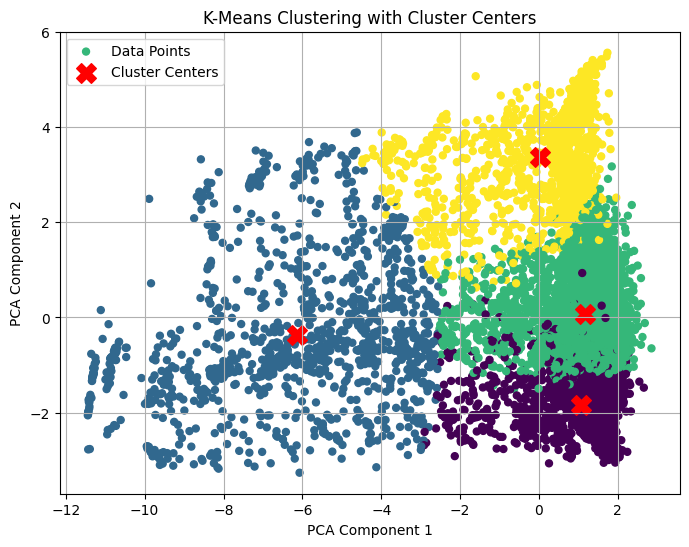

In [23]:
cluster_centers = pca.transform(kmeans.cluster_centers_)  # Transform centers to PCA space

kmeans_labels = KMeans(n_clusters=4, random_state=42, n_init=10).fit_predict(df_scaled)

# Scatter plot with cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=25, label="Data Points")
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label="Cluster Centers")
plt.title("K-Means Clustering with Cluster Centers")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print(f"Silhouette Score: {silhouette_score(df_scaled, clusters):.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(df_scaled, clusters):.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(df_scaled, clusters):.1f}")

Silhouette Score: 0.284
Davies-Bouldin Index: 1.194
Calinski-Harabasz Index: 4483.3


In [ ]:
kmeans.predict()

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score
import os


In [41]:
cols_to_log = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'
]

df_log = dataset.copy()
df_log[cols_to_log] = np.log1p(df_log[cols_to_log])



In [42]:
# Scaling باستخدام RobustScaler (مقاوم للـ outliers)
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_log)

C:\Users\zeyad-mohamed\AppData\Local\Temp\ipykernel_21960\2671343699.py:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K, inertia, 'bo-', marker='o')
C:\Users\zeyad-mohamed\AppData\Local\Temp\ipykernel_21960\2671343699.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "gs-" (-> marker='s'). The keyword argument will take precedence.
  plt.plot(K, silhouette_scores, 'gs-', marker='s')


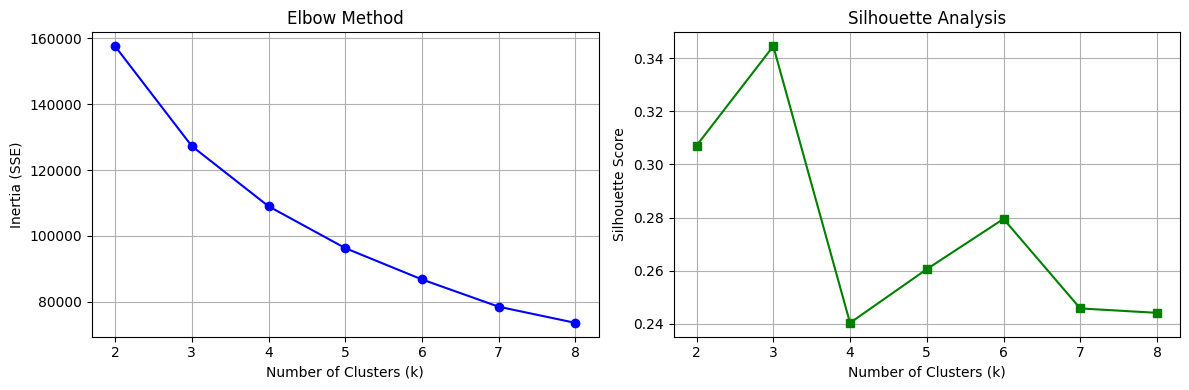

أفضل Silhouette Score:
  k=2: 0.3071
  k=3: 0.3445
  k=4: 0.2404
  k=5: 0.2606
  k=6: 0.2795
  k=7: 0.2458
  k=8: 0.2442


In [43]:
inertia = []
silhouette_scores = []
K = range(2, 9)

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(df_scaled)
    inertia.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

# رسم Elbow
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-', marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'gs-', marker='s')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.grid(True)

plt.tight_layout()
plt.show()

print("أفضل Silhouette Score:")
for k, score in zip(K, silhouette_scores):
    print(f"  k={k}: {score:.4f}")

In [44]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)  
# -------------------------------
# 6. PCA للتصور (بدون عمود Cluster!)
# -------------------------------
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_scaled)  
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

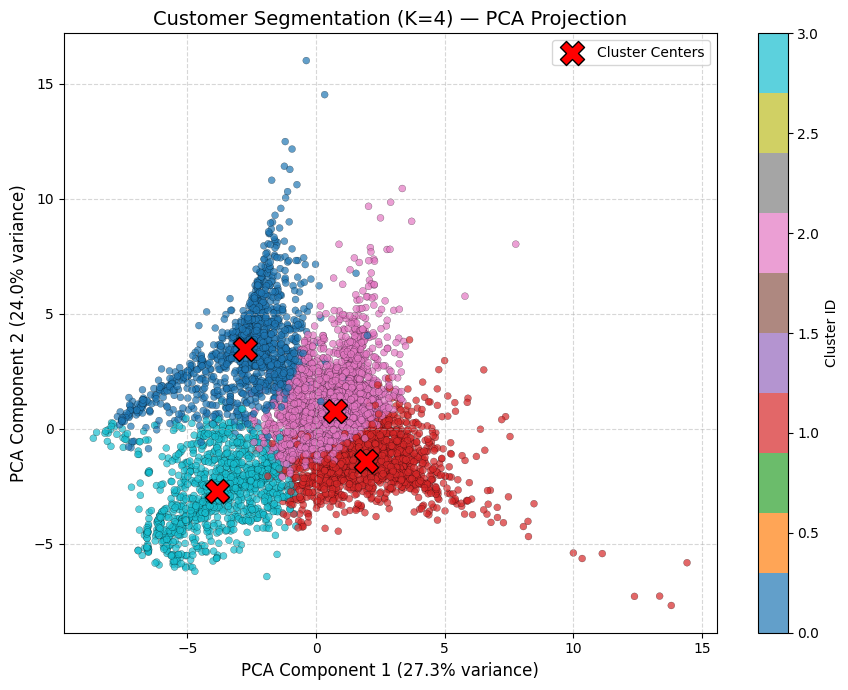

In [45]:
plt.figure(figsize=(9, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=25, alpha=0.7, edgecolor='k', linewidth=0.2)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1],
            c='red', marker='X', s=300, label="Cluster Centers", edgecolor='k')

plt.title(f"Customer Segmentation (K={k}) — PCA Projection", fontsize=14)
plt.xlabel(f"PCA Component 1 ({pca.explained_variance_ratio_[0]:.1%} variance)", fontsize=12)
plt.ylabel(f"PCA Component 2 ({pca.explained_variance_ratio_[1]:.1%} variance)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(scatter, label="Cluster ID")
plt.tight_layout()
plt.show()

In [47]:
dataset_with_cluster = dataset.copy()
dataset_with_cluster['Cluster'] = clusters

# متوسطات كل cluster على المتغيرات الأصلية
cluster_summary = dataset_with_cluster.groupby('Cluster').mean()
cluster_counts = dataset_with_cluster['Cluster'].value_counts().sort_index()

print("\n📊 عدد العملاء في كل مجموعة:")
print(cluster_counts)

print("\n📈 متوسطات المجموعات (بيانات أصلية - غير مُعَالَجة):")
# رتب حسب أهم متغيرات التفسير
key_cols = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
            'PAYMENTS', 'PRC_FULL_PASSWORD', 'TENURE']  # انتبه: PRC_FULL_PAYMENT مكتوبة غلط هنا

# التصحيح:
key_cols = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
            'PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

print(cluster_summary[key_cols].round(2))



📊 عدد العملاء في كل مجموعة:
Cluster
0    1210
1    2732
2    3784
3    1224
Name: count, dtype: int64

📈 متوسطات المجموعات (بيانات أصلية - غير مُعَالَجة):
         BALANCE  PURCHASES  CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  \
Cluster                                                             
0         194.64    1941.24         91.56       5039.92   2115.17   
1        2750.15     242.36       2509.64       4628.98   1955.20   
2        1604.58    1466.13        330.84       4496.22   1628.71   
3         148.20     342.98        442.72       3648.25   1182.72   

         PRC_FULL_PAYMENT  TENURE  
Cluster                            
0                    0.82   11.45  
1                    0.03   11.31  
2                    0.05   11.76  
3                    0.11   11.31  


C:\Users\zeyad-mohamed\AppData\Local\Temp\ipykernel_21960\653635149.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset_with_cluster, x='Cluster', y=col, palette='Set2')
C:\Users\zeyad-mohamed\AppData\Local\Temp\ipykernel_21960\653635149.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset_with_cluster, x='Cluster', y=col, palette='Set2')
C:\Users\zeyad-mohamed\AppData\Local\Temp\ipykernel_21960\653635149.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset_with_cluster, x='Cluster', y=col, palette='Set2'

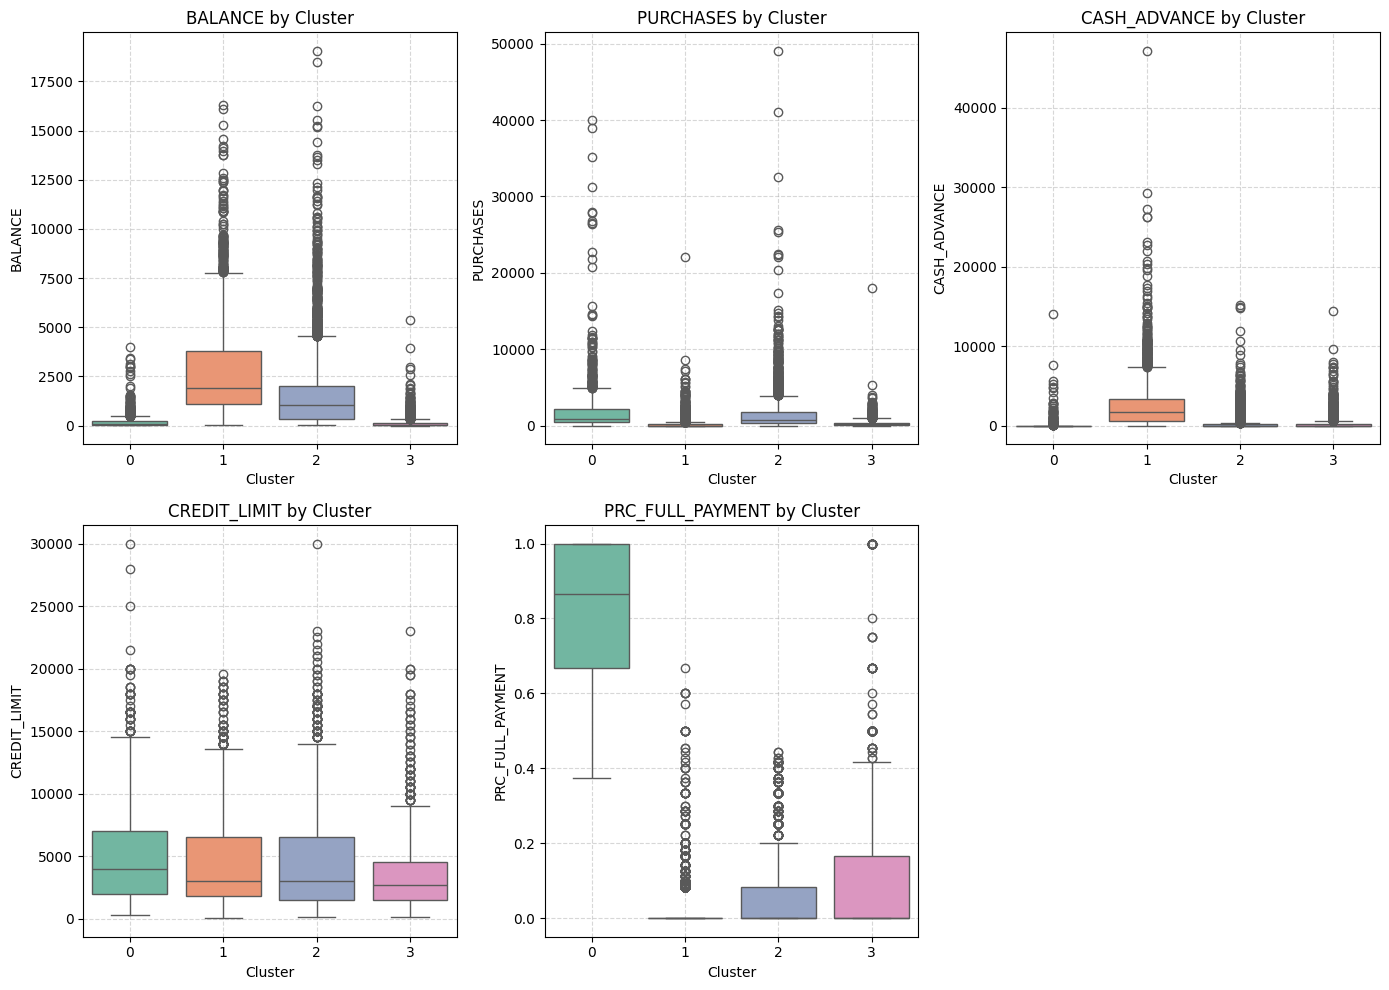

In [48]:
plt.figure(figsize=(14, 10))
cols_plot = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT']

for i, col in enumerate(cols_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=dataset_with_cluster, x='Cluster', y=col, palette='Set2')
    plt.title(f'{col} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [49]:
def predict_customer(customer_dict, verbose=True):

    # 1. تحويل الـ dict لـ DataFrame
    customer_df = pd.DataFrame([customer_dict])
    
    # 2. نفس preprocessing (log + scaling)
    customer_log = customer_df.copy()
    customer_log[cols_to_log] = np.log1p(customer_log[cols_to_log])
    customer_scaled = scaler.transform(customer_log)
    
    # 3. التنبؤ
    cluster_id = kmeans.predict(customer_scaled)[0]
    
    if not verbose:
        return int(cluster_id)
    
    # 4. تحليل وطباعة
    print("="*50)
    print(f"🎯 تنبؤ مجموعة عميل جديد")
    print("="*50)
    print(f"✅ **ينتمي للمجموعة**: {cluster_id}")
    
    # المسافات من المراكز
    distances = np.linalg.norm(kmeans.cluster_centers_ - customer_scaled, axis=1)
    print(f"📏 أقرب مركز: المجموعة {np.argmin(distances)} (المسافة = {distances[cluster_id]:.4f})")
    
    # وصف المجموعة من التلخيص اللي عملناه قبل كده
    if 'dataset_with_cluster' in globals():
        summary = dataset_with_cluster.groupby('Cluster').mean()
        desc = summary.loc[cluster_id, ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT']].to_dict()
        print("\n📊 متوسطات المجموعة (لللمحة سريعة):")
        for k, v in desc.items():
            print(f"   • {k}: {v:.2f}")
    
    # توصيف لغوي (يمكنك تعديله حسب تحليلك)
    cluster_labels = {
        0: "Low Activity, High Balance (Inactive Holders)",
        1: "High Spenders, Full Payers (Premium)",
        2: "Cash Advance Reliant (High Risk)",
        3: "Installment Shoppers (Moderate Spend)"
    }
    print(f"\n🔖 التوصيف المقترح: **{cluster_labels.get(cluster_id, 'غير معروف')}**")
    print("="*50)
    
    return int(cluster_id)

In [58]:
# عميل جديد (أدخل القيم الحقيقية اللي عندك)
new_client = {
    'BALANCE': 105000.0,
    'BALANCE_FREQUENCY': 1.0,
    'PURCHASES': 30000.0,
    'ONEOFF_PURCHASES': 2000.0,
    'INSTALLMENTS_PURCHASES': 10.0,
    'CASH_ADVANCE': 0.0,
    'PURCHASES_FREQUENCY': 0.8,
    'ONEOFF_PURCHASES_FREQUENCY': 0.6,
    'PURCHASES_INSTALLMENTS_FREQUENCY': 0.4,
    'CASH_ADVANCE_FREQUENCY': 0.0,
    'CASH_ADVANCE_TRX': 0,
    'PURCHASES_TRX': 20,
    'CREDIT_LIMIT': 80000.0,
    'PAYMENTS': 250000.0,
    'MINIMUM_PAYMENTS': 40000.0,
    'PRC_FULL_PAYMENT': 0.25,
    'TENURE': 12
}

# التنبؤ!
cluster = predict_customer(new_client)

🎯 تنبؤ مجموعة عميل جديد
✅ **ينتمي للمجموعة**: 2
📏 أقرب مركز: المجموعة 2 (المسافة = 5.8976)

📊 متوسطات المجموعة (لللمحة سريعة):
   • BALANCE: 1604.58
   • PURCHASES: 1466.13
   • CASH_ADVANCE: 330.84
   • CREDIT_LIMIT: 4496.22
   • PRC_FULL_PAYMENT: 0.05

🔖 التوصيف المقترح: **Cash Advance Reliant (High Risk)**
